<a href="https://colab.research.google.com/github/ArtNatalya/Python_CL_2023/blob/main/%D0%90%D1%80%D1%82%D0%B5%D0%BC%D1%8C%D0%B5%D0%B2%D0%B0_%D0%B8_%D0%94%D0%BE%D1%80%D0%BE%D1%84%D0%B5%D0%B9%2C_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

# Загрузка уже готового датасета со сказками
df = pd.read_csv('fairy_tales.csv')

# Предположим, что в исходном датасете каждая строка - это одна сказка
# Удаление лишних символов и пробелов
df['tale'] = df['Tales'].apply(lambda x: re.sub(r'\s+', ' ', x))  # Удаление лишних пробелов и переносов строк
df['tale'] = df['Tales'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', ' ', x))  # Удаление непечатных символов

# Перемешивание данных
df = df.sample(frac=1).reset_index(drop=True)

# Разделение на тренировочное и тестовое множества (80% на 20%)
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Сохранение датасетов в файлы
train_df.to_csv('train_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

# Выводим первые 100 символов для проверки
print("Первые 100 символов тренировочного множества:")
print(train_df['Tales'].str[:100].head(1).values[0])

print("Первые 100 символов тестового множества:")
print(test_df['Tales'].str[:100].head(1).values[0])

Первые 100 символов тренировочного множества:
There were once two brothers, one rich, the other poor. The first brother, rich as he was, gave no h
Первые 100 символов тестового множества:
There was once a woman who had three daughters. She called the eldest One Eye, because she had one e


In [ ]:
!pip install transformers
!pip install accelerate -U
!pip install datasets
!pip install pyarrow==8.0.0

import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import load_dataset, Dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 16.1.0
    Uninstalling pyarrow-16.1.0:
      Successfully uninstalled pyarrow-16.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 8.0.0 which is incompatible.
datasets 2.20.0 requires pyarrow>=15.0.0, but you have pyarrow 8.0.0 which is incompatible.


KeyboardInterrupt: 

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments, TextDataset, DataCollatorForLanguageModeling
from datasets import load_dataset

# Загрузка токенизатора и модели
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Функция для загрузки датасета
def load_dataset(file_path, tokenizer, block_size=128):
    dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size
    )
    return dataset

# Функция для создания data collator
def create_data_collator(tokenizer):
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=False,
    )
    return data_collator

# Загрузка датасетов
train_dataset = load_dataset('train_dataset.csv', tokenizer)
test_dataset = load_dataset('test_dataset.csv', tokenizer)

# Создание data collator
data_collator = create_data_collator(tokenizer)

# Настройки обучения
training_args = TrainingArguments(
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    eval_steps=400,
    save_steps=800,
    warmup_steps=500,
    prediction_loss_only=True,
)

# Создание тренера
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Обучение модели
trainer.train()

# Сохранение модели
model.save_pretrained('./gpt2_fairy_tales')
tokenizer.save_pretrained('./gpt2_fairy_tales')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


Step,Training Loss
500,3.153800
1000,2.650400
1500,2.399400


Step,Training Loss
500,3.153800
1000,2.650400
1500,2.399400
2000,2.222100
2500,2.095500


('./gpt2_fairy_tales/tokenizer_config.json',
 './gpt2_fairy_tales/special_tokens_map.json',
 './gpt2_fairy_tales/vocab.json',
 './gpt2_fairy_tales/merges.txt',
 './gpt2_fairy_tales/added_tokens.json')

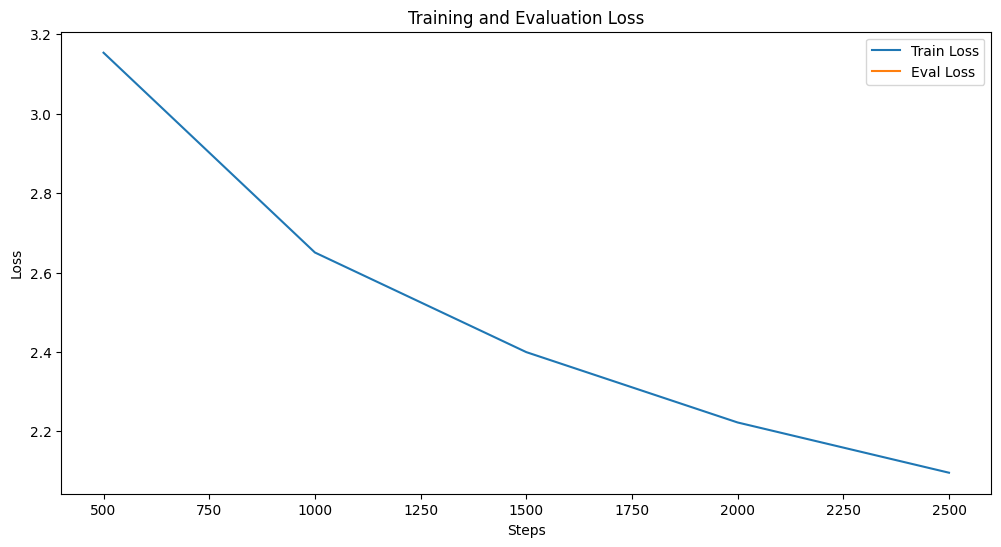

In [ ]:
import matplotlib.pyplot as plt

# Получение истории обучения
train_loss = trainer.state.log_history

# Извлечение значений потерь
steps = []
losses = []
eval_steps = []
eval_losses = []

for log in train_loss:
    if 'loss' in log:
        steps.append(log['step'])
        losses.append(log['loss'])
    if 'eval_loss' in log:
        eval_steps.append(log['step'])
        eval_losses.append(log['eval_loss'])

# Построение графиков потерь
plt.figure(figsize=(12, 6))
plt.plot(steps, losses, label='Train Loss')
plt.plot(eval_steps, eval_losses, label='Eval Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Evaluation Loss')
plt.show()

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Загрузка обученной модели и токенизатора
model_path = './gpt2_fairy_tales'
model = GPT2LMHeadModel.from_pretrained(model_path)
tokenizer = GPT2Tokenizer.from_pretrained(model_path)

# Функция для генерации текста
def generate_text(prompt, max_length=200, num_return_sequences=1):
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(
        inputs,
        max_length=max_length,
        num_return_sequences=num_return_sequences,
        no_repeat_ngram_size=2,
        top_p=0.95,
        top_k=50
    )
    return [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]

In [ ]:
# Пример генерации текста
prompt = "One day, a good King and his beautiful Queen have a baby.They are very happy"
generated_texts = generate_text(prompt, max_length=1000, num_return_sequences=1)

for i, text in enumerate(generated_texts):
    print(f"Generated Text {i+1}:\n{text}\n")